In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, poisson

# MI Sheet 08
Martin Iniguez de Onzono, Martin Krück, Jana Köhler
## Exercise H8.2: Variability of classification

In [2]:
# Generate p data points
def generate_data(p):
    mean = [[0, 1], [1, 0]]
    cov = 2 * np.eye(2)
    x = np.ones((p,3))
    y = np.ones(p)
    uneven = 0
    if p%2 !=0:
        uneven = 1
    x[:int(p/2), 1::] = np.random.multivariate_normal(mean[0], cov, int(p/2)) 
    x[int(p/2)::, 1::] = np.random.multivariate_normal(mean[1], cov, int((p+uneven)/2))
    
    y[int(p/2)::] = -1
    
    return x, y

# linear connectionist neuron
def linear_neuron(x, w):
    return np.sign(w @ x.T)

# analytical solution
def opt_weights(x, y):
    return np.linalg.inv(x.T @ x) @ x.T @ y

def accuracy(y_label, y_pred):
    correct = 0
    for i, y in enumerate(y_pred): 
        if y_pred[i] == y_label[i]:
            correct+=1
    return correct/len(y_pred)

def axis(axis, title):
    axis.set_xlabel('x1')
    axis.set_ylabel('x2')
    axis.set_title(title)

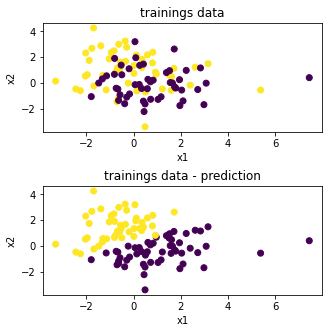

In [3]:
p_train = 100
x_train, y_train = generate_data(p_train)
w = opt_weights(x_train, y_train)

y_pred_train = linear_neuron(x_train, w)

fig, (ax1, ax2) = plt.subplots(2, figsize=[5,5])
fig.subplots_adjust(hspace=0.5)
ax1.scatter(x=x_train[:,1], y=x_train[:,2], c=y_train)
ax2.scatter(x=x_train[:,1], y=x_train[:,2], c=y_pred_train)
axis(ax1, 'trainings data')
axis(ax2, 'trainings data - prediction')

Accuracy training data:  0.69  accuracy test data:  0.684


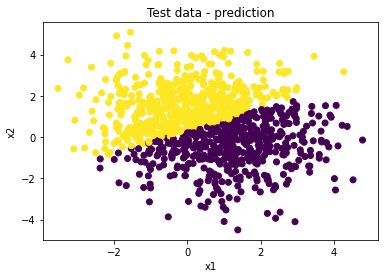

In [4]:
p_test = 1000
x_test, y_test = generate_data(p_test)

y_pred_test = linear_neuron(x_test, w)
fig, (ax1) = plt.subplots(1)
ax1.scatter(x=x_test[:,1], y=x_test[:,2], c=y_pred_test)
axis(ax1, 'Test data - prediction')

r_train = accuracy(y_train, y_pred_train)
r_test = accuracy(y_test, y_pred_test)

print('Accuracy training data: ', r_train,' accuracy test data: ', r_test)

### Deliverables:
### a)

In [12]:
p_train =[3, 4, 6, 8, 10, 20, 40, 100]
p_test = 1000
weights = np.zeros((50, len(p_train), 3))
r_test = np.zeros((50, len(p_train)))
r_train = np.zeros((50, len(p_train)))

for i in range(50):
    for j, p in enumerate(p_train):
        x_train, y_train = generate_data(p)
        
        #w = opt_weights(x_train, y_train)
        weights[i, j, :] = opt_weights(x_train, y_train)
        y_pred_train = linear_neuron(x_train, weights[i, j])
        r_train[i, j] = accuracy(y_train, y_pred_train)
        x_test, y_test = generate_data(p_test)
        y_pred_test = linear_neuron(x_test, weights[i, j])
        r_test[i, j] = accuracy(y_test, y_pred_test)
   

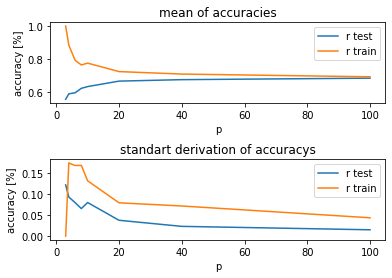

In [13]:
fig, (ax1, ax2) = plt.subplots(2)
fig.subplots_adjust(hspace=0.7)
ax1.errorbar(p_train, np.mean(r_test, axis=0), label='r test')
ax1.errorbar(p_train, np.mean(r_train, axis=0), label='r train')
ax1.set_xlabel('p')
ax1.set_ylabel('accuracy [%]')
ax1.legend()
ax1.set_title('mean of accuracies')
ax2.plot(p_train, np.std(r_test, axis=0), label='r test')
ax2.plot(p_train, np.std(r_train, axis=0), label='r train')
ax2.set_title('standart derivation of accuracys')
ax2.set_xlabel('p')
ax2.set_ylabel('accuracy [%]')
ax2.legend()

### b)

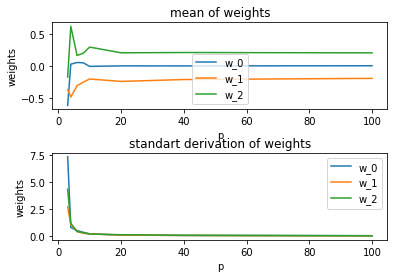

In [14]:
fig, (ax1, ax2) = plt.subplots(2)
fig.subplots_adjust(hspace=0.5)
ax1.plot(p_train, np.mean(weights[:,:,0], axis=0), label='w_0' )
ax1.plot(p_train, np.mean(weights[:,:,1], axis=0), label='w_1')
ax1.plot(p_train, np.mean(weights[:,:,2], axis=0), label='w_2')
ax1.set_xlabel('p')
ax1.set_ylabel('weights')
ax1.legend()
ax1.set_title('mean of weights')
ax2.plot(p_train, np.std(weights[:,:,0], axis=0), label='w_0')
ax2.plot(p_train, np.std(weights[:,:,1], axis=0), label='w_1')
ax2.plot(p_train, np.std(weights[:,:,2], axis=0), label='w_2')
ax2.set_title('standart derivation of weights')
ax2.set_xlabel('p')
ax2.set_ylabel('weights')
ax2.legend()

### c)
With larger p, the accuracy of the training data decreases but the accuracy of the test data increases. They converge to the same accuracy, what means that we avoid overfitting. The standartderivation decreases with larger p what means that the results are very stable.

The weights converge to a stable value with large p and the standart derivation goes to cero. 
and test data becomes more equal and stable. 

Between p =  1 and p = 20 (40) there are big changes in the weights and accuracies, for p bigger 40 there are only small changes in the weights and the accuracies and the standart derivation is already close to zero.

## Exercise H8.3: The Binomial distribution
### a) 

In [ ]:
n = [1, 5, 10, 50, 100]
#n=100
p = [0.1, 0.3, 0.5, 0.7, 0.9]
#p = 0.4
a = np.ones(len(n))
fig, a = plt.subplots(len(n), figsize=[5,15])
fig.subplots_adjust(hspace=0.5)
for i, n_i in enumerate(n):
    for p_i in p:
        k_values = list(range(int(n_i) + 1)) 
        binomial_dist = [binom.pmf(k, n_i, p_i) for k in k_values ] 
        
        a[i].plot(k_values, binomial_dist, '.',linestyle='-', label='p = '+str(p_i))
    a[i].set_title('n = '+str(n_i))
    a[i].set_xlabel('k')
    a[i].set_ylabel('p')
    a[i].legend()



### b)

Text(0.5, 1.0, 'n = 100 p = 0.8')

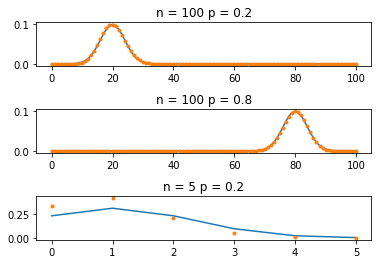

In [9]:
n = 100
p = 0.2

k_values = list(range(int(n) + 1)) 

fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.subplots_adjust(hspace=1)
norm_dist = [norm.pdf(k, loc=(p*n), scale=4) for k in k_values ] 
ax1.plot(k_values, norm_dist)
binomial_dist = [binom.pmf(k, n, p) for k in k_values ] 
ax1.plot(k_values, binomial_dist, '.', label='p = '+str(p_i))
ax1.set_title('n = '+str(n)+' p = '+str(p))

n = 5
p = 0.2
k_values = list(range(int(n) + 1)) 

norm_dist = [norm.pdf(k, loc=p*n, scale=1.3) for k in k_values ] 
ax3.plot(k_values, norm_dist)
binomial_dist = [binom.pmf(k, n, p) for k in k_values ] 
ax3.plot(k_values, binomial_dist, '.', label='p = '+str(p_i))
ax3.set_title('n = '+str(n)+' p = '+str(p))

n = 100
p = 0.8
k_values = list(range(int(n) + 1)) 

norm_dist = [norm.pdf(k, loc=p*n, scale=4) for k in k_values ] 
ax2.plot(k_values, norm_dist)
binomial_dist = [binom.pmf(k, n, p) for k in k_values ] 
ax2.plot(k_values, binomial_dist, '.', label='p = '+str(p_i))
ax2.set_title('n = '+str(n)+' p = '+str(p))

For n -> infinity the binomial distribution converges to the normal distribution, for small n the normal distribution is a bad approximation. 
One reason why the normal distribution is widely used is that, according to the central limit theorem (CLT), when independent random variables are added, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed. 

### c)

Text(0.5, 1.0, 'n = 10 p = 0.15')

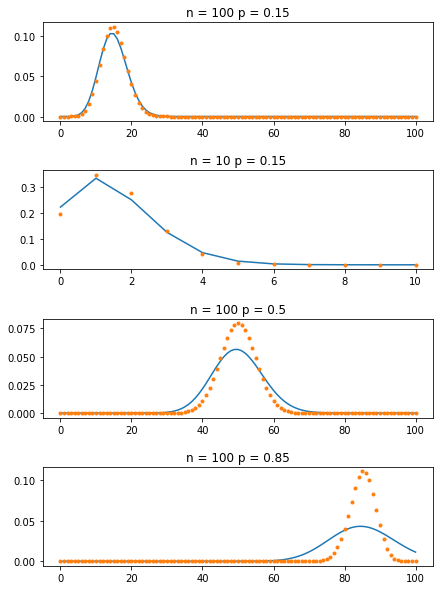

In [10]:
n = 100
p = 0.15
k_values = list(range(int(n) + 1)) 

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=[7,10])
fig.subplots_adjust(hspace=0.5)
norm_dist = [poisson.pmf(k, mu=p*n) for k in k_values ] 
ax1.plot(k_values, norm_dist)
binomial_dist = [binom.pmf(k, n, p) for k in k_values ] 
ax1.plot(k_values, binomial_dist, '.', label='p = '+str(p_i))
ax1.set_title('n = '+str(n)+' p = '+str(p))

n = 100
p = 0.5
k_values = list(range(int(n) + 1)) 

norm_dist = [poisson.pmf(k, mu=p*n) for k in k_values ] 
ax3.plot(k_values, norm_dist)
binomial_dist = [binom.pmf(k, n, p) for k in k_values ] 
ax3.plot(k_values, binomial_dist, '.', label='p = '+str(p_i))
ax3.set_title('n = '+str(n)+' p = '+str(p))

n = 100
p = 0.85
k_values = list(range(int(n) + 1)) 

norm_dist = [poisson.pmf(k, mu=p*n) for k in k_values ] 
ax4.plot(k_values, norm_dist)
binomial_dist = [binom.pmf(k, n, p) for k in k_values ] 
ax4.plot(k_values, binomial_dist, '.', label='p = '+str(p_i))
ax4.set_title('n = '+str(n)+' p = '+str(p))

n = 10
p = 0.15
k_values = list(range(int(n) + 1)) 

norm_dist = [poisson.pmf(k, mu=p*n) for k in k_values ] 
ax2.plot(k_values, norm_dist)
binomial_dist = [binom.pmf(k, n, p) for k in k_values ] 
ax2.plot(k_values, binomial_dist, '.', label='p = '+str(p_i))
ax2.set_title('n = '+str(n)+' p = '+str(p))


The Poisson distribution a good approximation for big sample sizes n and small probabilities p. 